Pymaceuticals Analysis

250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Below is an analytis to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

By Sandra Pastana

In [1]:
#                           Get the data into a single dataframe, filtering by relevant drugs only.

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse=pd.read_csv(mouse_drug_data_to_load)
clinical=pd.read_csv(clinical_trial_data_to_load)

clinical.head()
# Combine the data into a single dataset and filter by the drugs we will test
CombinedDF = pd.merge(clinical, mouse, on="Mouse ID", how='left')
CombinedDF= CombinedDF.loc[(CombinedDF["Drug"]=="Capomulin")|( CombinedDF["Drug"]=="Infubinol")|( CombinedDF["Drug"]== "Ketapril")|( CombinedDF["Drug"]=="Placebo")] 
# Display the data table for preview

CombinedDF.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin


## Tumor Response to Treatment

In [2]:
#                                    Summarize data

GroupByDF=CombinedDF.groupby(["Drug","Timepoint"])
DrugDF=GroupByDF.mean()
DrugDF["MiceCount"]=GroupByDF["Mouse ID"].nunique()


#drop index so that I can select on the columns
DrugDF.reset_index(inplace=True)
#create lists on drug, timepoint, so that I can loop through each instance to create a list of tumor values
DistinctValues=DrugDF[["Drug","Timepoint"]]

DrugDF.head(1)

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,MiceCount
0,Capomulin,0,45.0,0.0,25


In [3]:
#                       Create a summary table ofr the standard error on tumor by drug/Timepoint

#to calculate the standard error of each drug timepoint, I need for make an array per Drug timepoint, with all of the values
#1.I get all distinct Drug, Timepoint values
#2. Look on the raw data file for all rows for that drug/timepoint. I will do this with a loop
#3. Once I have a dataset for one drug/timetable, I can take all of the values of the tumor column, and store them in a list.
    # I will do that with a loop
#4. I will store the results into a dataframe. so I will have one dataframe per Drug/Timepoint
#5. I make a master dataframe and append to it each instance


# Loop for as meany Drug/Timepoint combinations there is
LoopLen=len(DistinctValues)
LoopLen


for i in range(LoopLen):
    #Extract the value of the drug to be processsed, and get all rows for that drug/timepoint combination form the rawdata file
    tumorVolume=[]
    Drug=DistinctValues["Drug"].iloc[i]
    Timepoint=DistinctValues["Timepoint"].iloc[i]
    #select all rows form the raw data set for that drug and timepoint
    DrugTPDF = CombinedDF.loc[(CombinedDF["Drug"] == Drug) &  (  CombinedDF["Timepoint"] == Timepoint),: ]
    listItems=[DrugTPDF["Tumor Volume (mm3)"]] 
    #I have now one column with all of the relevant tumor values. I need to put them in a list to calculate the SE of the list
    for l in listItems:
        [l]
    #create a dataframe which will only have 1 row    
    IntDF=pd.DataFrame([{"Drug":Drug,"Timepoint":Timepoint,"Tumor sem":sem(l)}])
    #append to a master dataframe . if it is the first row, create the master data frame other wise append to it
    if i==0:
        SemDF=IntDF
    else:
        SemDF=SemDF.append(IntDF)
        
   


In [4]:
#                             Join the standard error dataframe with the summary I created initially
Summary = pd.merge(SemDF, DrugDF, on=["Drug", "Timepoint"])
Summary. head(1)

,Drug,Timepoint,Tumor sem,Tumor Volume (mm3),Metastatic Sites,MiceCount
0,Capomulin,0,0.0,45.0,0.0,25


In [5]:
#                       create a dataframe that lists the distinct drugs we will analyze
#create a list of distinct drugs
GroupByDF2=CombinedDF.groupby(["Drug"])
DrugDF2=GroupByDF2.mean()
DrugDF2.columns
#drop index so that I can select on the columns
DrugDF2.reset_index(inplace=True)
DrugDF2.head()

Distinctdrugs=DrugDF2[["Drug"]]
Distinctdrugs=Distinctdrugs.head(4)
LoopLen=len(Distinctdrugs)
Distinctdrugs

,Drug
0,Capomulin
1,Infubinol
2,Ketapril
3,Placebo


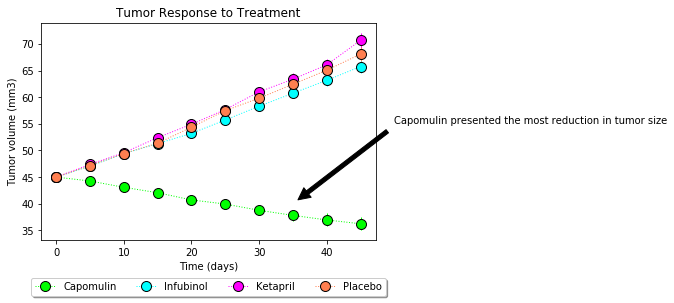

In [6]:
#                             plot the data, drug by drug. Loop one drug at the time selecting the data form the summary table


Colors=['lime','cyan','magenta','coral']
fmt=[]
#fig is what gets returned by subplots() we added before the loop so all scatterplots will be in one chart.
fig,    ax = plt.subplots()


#we will loop drug by drug, and create a subset of data per drug. we will chart one drug at the time
for i in range(LoopLen):
    

    #Extract the value of the drug to be processsed, and get all rows for that drug/timepoint combination form the rawdata file
    Drug=Distinctdrugs["Drug"].iloc[i]
    #select all rows form the raw data set for that drug and timepoint
    GraphDF= Summary.loc[(Summary["Drug"] == Drug),: ].sort_values(["Timepoint"], ascending=False)
    
   

    ax.errorbar(GraphDF["Timepoint"], GraphDF["Tumor Volume (mm3)"] , yerr=GraphDF["Tumor sem"], fmt="o",color=Colors[i]
               ,linestyle=':',linewidth=1, markeredgecolor='black',markeredgewidth=1,markersize=10,label=Drug)

#Format the legend axis and title    
ax.legend()
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -.15), shadow=True, ncol=4)
ax.set_xlabel("Time (days)")
ax.set_ylabel("Tumor volume (mm3)")
plt.title('Tumor Response to Treatment')

ax.annotate('Capomulin presented the most reduction in tumor size', xy=(35, 40), xytext=(50, 55),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )





#saves the image in the folder
plt.savefig("TumorResponse.png")
plt.show()
    

## Metastatic Response to Treatment

In [7]:
#                              repeat same procedure for Metastic. Calculate SEM

#to calculate the standard error of each drug timepoint, I need for make an array per Drug timepoint, with all of the values
#1.I get all distinct Drug, Timepoint values
#2. Look on the raw data file for all rows for that drug/timepoint. I will do this with a loop
#3. Once I have a dataset for one drug/timetable, I can take all of the values of the tumor column, and store them in a list.
    # I will do that with a loop
#4. I will store the results into a dataframe. so I will have one dataframe per Drug/Timepoint
#5. I make a master dataframe and append to it each instance


# Loop for as meany Drug/Timepoint combinations there is
LoopLen=len(DistinctValues)
LoopLen


for i in range(LoopLen):
    #Extract the value of the drug to be processsed, and get all rows for that drug/timepoint combination form the rawdata file
    tumorVolume=[]
    Drug=DistinctValues["Drug"].iloc[i]
    Timepoint=DistinctValues["Timepoint"].iloc[i]
    #select all rows form the raw data set for that drug and timepoint
    DrugTPDF = CombinedDF.loc[(CombinedDF["Drug"] == Drug) &  (  CombinedDF["Timepoint"] == Timepoint),: ]
    listItems=[DrugTPDF["Metastatic Sites"]] 
    #I have now one column with all of the relevant tumor values. I need to put them in a list to calculate the SE of the list
    for l in listItems:
        [l]
    #create a dataframe which will only have 1 row    
    IntDF=pd.DataFrame([{"Drug":Drug,"Timepoint":Timepoint,"Metastatic sem":sem(l)}])
    #append to a master dataframe . if it is the first row, create the master data frame other wise append to it
    if i==0:
        MetDF=IntDF
    else:
        MetDF=MetDF.append(IntDF)
        
DrugDF.head()
#join with the summarized database
MetSummary = pd.merge(MetDF, DrugDF, on=["Drug", "Timepoint"])
MetSummary.head()


,Drug,Metastatic sem,Timepoint,Tumor Volume (mm3),Metastatic Sites,MiceCount
0,Capomulin,0.000000,0,45.000000,0.000000,25
1,Capomulin,0.074833,5,44.266086,0.160000,25
2,Capomulin,0.125433,10,43.084291,0.320000,25
3,Capomulin,0.132048,15,42.064317,0.375000,24
4,Capomulin,0.161621,20,40.716325,0.652174,23


In [8]:
#create a list of distinct drugs
GroupByDF2=CombinedDF.groupby(["Drug"])
DrugDF2=GroupByDF2.mean()
DrugDF2.columns
#drop index so that I can select on the columns
DrugDF2.reset_index(inplace=True)
DrugDF2.head()

Distinctdrugs=DrugDF2[["Drug"]]
Distinctdrugs=Distinctdrugs.head(4)
LoopLen=len(Distinctdrugs)
Distinctdrugs


,Drug
0,Capomulin
1,Infubinol
2,Ketapril
3,Placebo


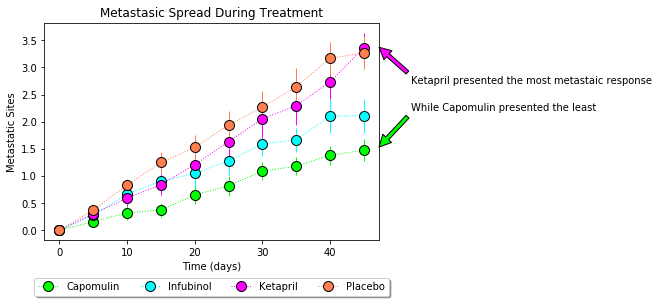

In [9]:
#                             plot the data, drug by drug. Loop one drug at the time selecting the data form the summary table

Colors=['lime','cyan','magenta','coral']
fmt=[]
#fig is what gets returned by subplots() we added before the loop so all scatterplots will be in one chart.
fig,    ax = plt.subplots()


#we will loop drug by drug, and create a subset of data per drug. we will chart one drug at the time
for i in range(LoopLen):
    

    #Extract the value of the drug to be processsed, and get all rows for that drug/timepoint combination form the rawdata file
    Drug=Distinctdrugs["Drug"].iloc[i]
    #select all rows form the raw data set for that drug and timepoint
    GraphDF= MetSummary.loc[(MetSummary["Drug"] == Drug),: ].sort_values(["Timepoint"], ascending=False)
    
   

    ax.errorbar(GraphDF["Timepoint"], GraphDF["Metastatic Sites"] , yerr=GraphDF["Metastatic sem"], fmt="o",color=Colors[i]
               ,linestyle=':',linewidth=1, markeredgecolor='black',markeredgewidth=1,markersize=10,label=Drug)

#Format the legend axis and title    
ax.legend()
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -.15), shadow=True, ncol=4)
ax.set_xlabel("Time (days)")
ax.set_ylabel("Metastatic Sites")
plt.title('Metastasic Spread During Treatment')
ax.annotate('While Capomulin presented the least', xy=(47, 1.5), xytext=(52, 2.2),
            arrowprops=dict(facecolor='lime', shrink=0.05),
            )
ax.annotate('Ketapril presented the most metastaic response', xy=(47, 3.4), xytext=(52, 2.7),
            arrowprops=dict(facecolor='magenta', shrink=0.05),
            )
plt.savefig("MetastaticResponse.png")
plt.show()



    

## Survival Rates

In [10]:
#create a list of distinct drugs
GroupByDF2=CombinedDF.groupby(["Drug"])
DrugDF2=GroupByDF2.mean()
DrugDF2.columns
#drop index so that I can select on the columns
DrugDF2.reset_index(inplace=True)
DrugDF2.head()

Distinctdrugs=DrugDF2[["Drug"]]
Distinctdrugs=Distinctdrugs.head(4)
LoopLen=len(Distinctdrugs)
Distinctdrugs


,Drug
0,Capomulin
1,Infubinol
2,Ketapril
3,Placebo


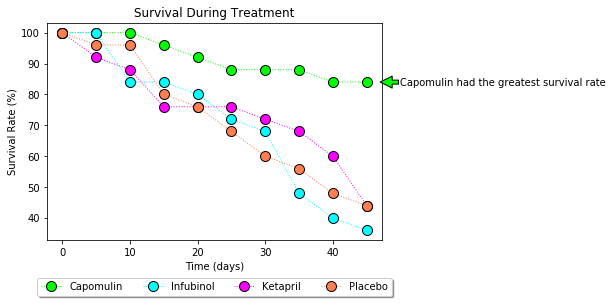

In [11]:

Colors=['lime','cyan','magenta','coral']
#fig is what gets returned by subplots() we added before the loop so all scatterplots will be in one chart.
fig,    ax = plt.subplots()


#we will loop drug by drug, and create a subset of data per drug. we will chart one drug at the time
for i in range(LoopLen):
    

    #Extract the value of the drug to be processsed, and get all rows for that drug/timepoint combination form the rawdata file
    Drug=Distinctdrugs["Drug"].iloc[i]
    #select all rows form the raw data set for that drug and timepoint
    GraphDF= DrugDF.loc[(DrugDF["Drug"] == Drug),: ].sort_values(["Timepoint"], ascending=False)
    
   

    ax.errorbar(GraphDF["Timepoint"], (GraphDF["MiceCount"]/25)*100 ,  fmt="o",color=Colors[i]
               ,linestyle=':',linewidth=1, markeredgecolor='black',markeredgewidth=1,markersize=10,label=Drug)

#Format the legend axis and title    
ax.legend()
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -.15), shadow=True, ncol=4)
ax.set_xlabel("Time (days)")
ax.set_ylabel("Survival Rate (%)")
plt.title('Survival During Treatment')
ax.annotate('Capomulin had the greatest survival rate', xy=(47, 84), xytext=(50, 83),
            arrowprops=dict(facecolor='lime', shrink=30),
            )

plt.savefig("TumorChange.png")
plt.show()


## Summary Bar Graph

In [12]:
#                 using the initial summary dataframe look at initial/ending values to calclulate % change
#                                                 pero Drug per time

FirstDF=DrugDF.loc[DrugDF["Timepoint"]==0]
LastDF=DrugDF.loc[DrugDF["Timepoint"]==45]

ChangeDF=pd.merge(FirstDF,LastDF, on ='Drug')

ChangeDF["change"]=((ChangeDF["Tumor Volume (mm3)_y"]-ChangeDF["Tumor Volume (mm3)_x"])/ChangeDF["Tumor Volume (mm3)_x"])*100
ChangeDF["changeLabel"]=ChangeDF["change"].map("{:.0f}%".format)
ChangeDF

,Drug,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,MiceCount_x,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y,MiceCount_y,change,changeLabel
0,Capomulin,0,45.0,0.0,25,45,36.236114,1.476190,21,-19.475303,-19%
1,Infubinol,0,45.0,0.0,25,45,65.755562,2.111111,9,46.123472,46%
2,Ketapril,0,45.0,0.0,25,45,70.662958,3.363636,11,57.028795,57%
3,Placebo,0,45.0,0.0,25,45,68.084082,3.272727,11,51.297960,51%


In [13]:
DrugDF.head()
GroupByDF=DrugDF.groupby(["Drug"])
TumorChangeDF=GroupByDF.max()
TumorChangeDF["min tumor"]=GroupByDF["Tumor Volume (mm3)"].min()
TumorChangeDF["Change"]=(TumorChangeDF["min tumor"]-TumorChangeDF["Tumor Volume (mm3)"])/TumorChangeDF["Tumor Volume (mm3)"]
#late the percent changes for each drug
TumorChangeDF
                                                                                                       # Display the data to confirm


,Timepoint,Tumor Volume (mm3),Metastatic Sites,MiceCount,min tumor,Change
Drug,,,,,,
Capomulin,45,45.000000,1.476190,25,36.236114,-0.194753
Infubinol,45,65.755562,2.111111,25,45.000000,-0.315647
Ketapril,45,70.662958,3.363636,25,45.000000,-0.363174
Placebo,45,68.084082,3.272727,25,45.000000,-0.339053


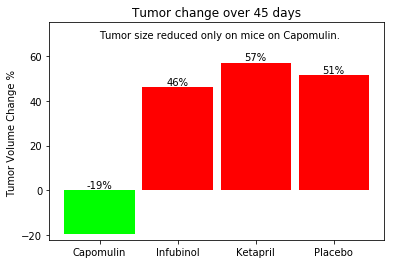

In [14]:
#Plot
fig, ax = plt.subplots()
rects1 = ax.bar(ChangeDF["Drug"], ChangeDF["change"], .9, color=['lime','red','red','red'], 
               label=ChangeDF["Drug"])

plt.ylabel('Tumor Volume Change % ')
plt.title('Tumor change over 45 days')
plt.ylim(-22,75)
ax.annotate('Tumor size reduced only on mice on Capomulin.',xy=(0,68))

# from  http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/
def autolabel(rects, ax):
    
    for rect in rects:
        height = rect.get_height()
            
        if height <0:
            label_position=0
        else:
            label_position = height 
        #text(x, y, s, fontdict=None, withdash=False, **kwargs)
        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                "{:.0f}%".format(height),
                ha='center', va='bottom'
               )

autolabel(rects1, ax)

# Set a grid on the plot
#plt.grid()

plt.savefig("TumorChange.png")
plt.show()
